<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Determine whether bacterial and archaeal alpha diversity significantly correlate

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/diversity-qiime2/'

# alpha diversity (calculated via qiime2)
alpha_div_arc_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/diversity-qiime2_arc/alpha_div_genus.RDS'
alpha_div_bac_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/diversity-qiime2_bac/alpha_div_genus.RDS'

# 16S-arch phyloseq object; rarefied
physeq_arc_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/physeq_arch_arc-bac_r250.RDS'
# 16S-bac phyloseq object; rarefied
physeq_bac_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/physeq_bac_arc-bac_r5k.RDS'


# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(ape)
library(vegan)
library(LeyLabRMisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [3]:
df.dims()
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/arch-bac/diversity-qiime2/ 


# Load

In [4]:
# loading phyloseq object
meta = readRDS(physeq_arc_file) %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name,
                  diet, habitat, sample_type)
meta 

SampleID,class,order,family,genus,scientific_name,diet,habitat,sample_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
F36_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Mammalia,Perissodactyla,Equidae,Equus,Equus_quagga,herbivore,terrestrial habitat,feces
X67_European_Roe,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus_capreolus,herbivore,terrestrial habitat,feces


In [5]:
# archaea
alpha_div_arc = readRDS(alpha_div_arc_file) %>%
    do.call(cbind, .) %>%
    mutate(sample = rownames(.),
           domain = 'arc')
alpha_div_arc 

pielou_e,observed_otus,shannon,faith_pd,sample,domain
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.7218501,5,1.6760840,3.237857,F35_Red_Deer,arc
0.3584153,2,0.3584153,1.152003,F36_Red_Deer,arc
⋮,⋮,⋮,⋮,⋮,⋮
0.3425089,5,0.7952810,2.951231,X431_Quagga,arc
0.1633455,2,0.1633455,1.152003,X67_European_Roe,arc


In [6]:
# bacteria
alpha_div_bac = readRDS(alpha_div_bac_file) %>%
    do.call(cbind, .) %>%
    mutate(sample = rownames(.),
           domain = 'bac')
alpha_div_bac 

pielou_e,observed_otus,shannon,faith_pd,sample,domain
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.7359725,115,5.038093,23.77608,X101_Horse,bac
0.6952273,91,4.524396,19.37970,X102_Kulan,bac
⋮,⋮,⋮,⋮,⋮,⋮
0.5689828,89,3.684581,19.407668,F80_Red_Deer,bac
0.7237770,28,3.479453,7.392197,F90_Domestic_Dog,bac


In [7]:
# combined
overlap(alpha_div_arc$sample, alpha_div_bac$sample)
alpha_div = rbind(alpha_div_arc, alpha_div_bac) %>%
    gather(alpha_div_metric, alpha_div_value, -sample, -domain)
alpha_div

intersect(x,y): 140 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 140 


sample,domain,alpha_div_metric,alpha_div_value
<chr>,<chr>,<chr>,<dbl>
F35_Red_Deer,arc,pielou_e,0.7218501
F36_Red_Deer,arc,pielou_e,0.3584153
⋮,⋮,⋮,⋮
F80_Red_Deer,bac,faith_pd,19.407668
F90_Domestic_Dog,bac,faith_pd,7.392197


In [8]:
# adding metadata
overlap(alpha_div$sample, meta$SampleID)
alpha_div = alpha_div %>%
    inner_join(meta, c('sample'='SampleID'))
alpha_div

intersect(x,y): 140 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 140 


sample,domain,alpha_div_metric,alpha_div_value,class,order,family,genus,scientific_name,diet,habitat,sample_type
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F35_Red_Deer,arc,pielou_e,0.7218501,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
F36_Red_Deer,arc,pielou_e,0.3584153,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
F80_Red_Deer,bac,faith_pd,19.407668,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
F90_Domestic_Dog,bac,faith_pd,7.392197,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,carnivore,terrestrial habitat,feces


In [9]:
# formatting
alpha_div = alpha_div %>%
    mutate(alpha_div_metric = case_when(alpha_div_metric == 'faith_pd' ~ 'Faith\'s PD',
                                        alpha_div_metric == 'observed_otus' ~ 'Observed OTUs',
                                        alpha_div_metric == 'pielou_e' ~ 'Pielou\'s E',
                                        alpha_div_metric == 'shannon' ~ 'Shannon Index'))
alpha_div

sample,domain,alpha_div_metric,alpha_div_value,class,order,family,genus,scientific_name,diet,habitat,sample_type
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F35_Red_Deer,arc,Pielou's E,0.7218501,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
F36_Red_Deer,arc,Pielou's E,0.3584153,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
F80_Red_Deer,bac,Faith's PD,19.407668,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat,feces
F90_Domestic_Dog,bac,Faith's PD,7.392197,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,carnivore,terrestrial habitat,feces


# Explore

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”


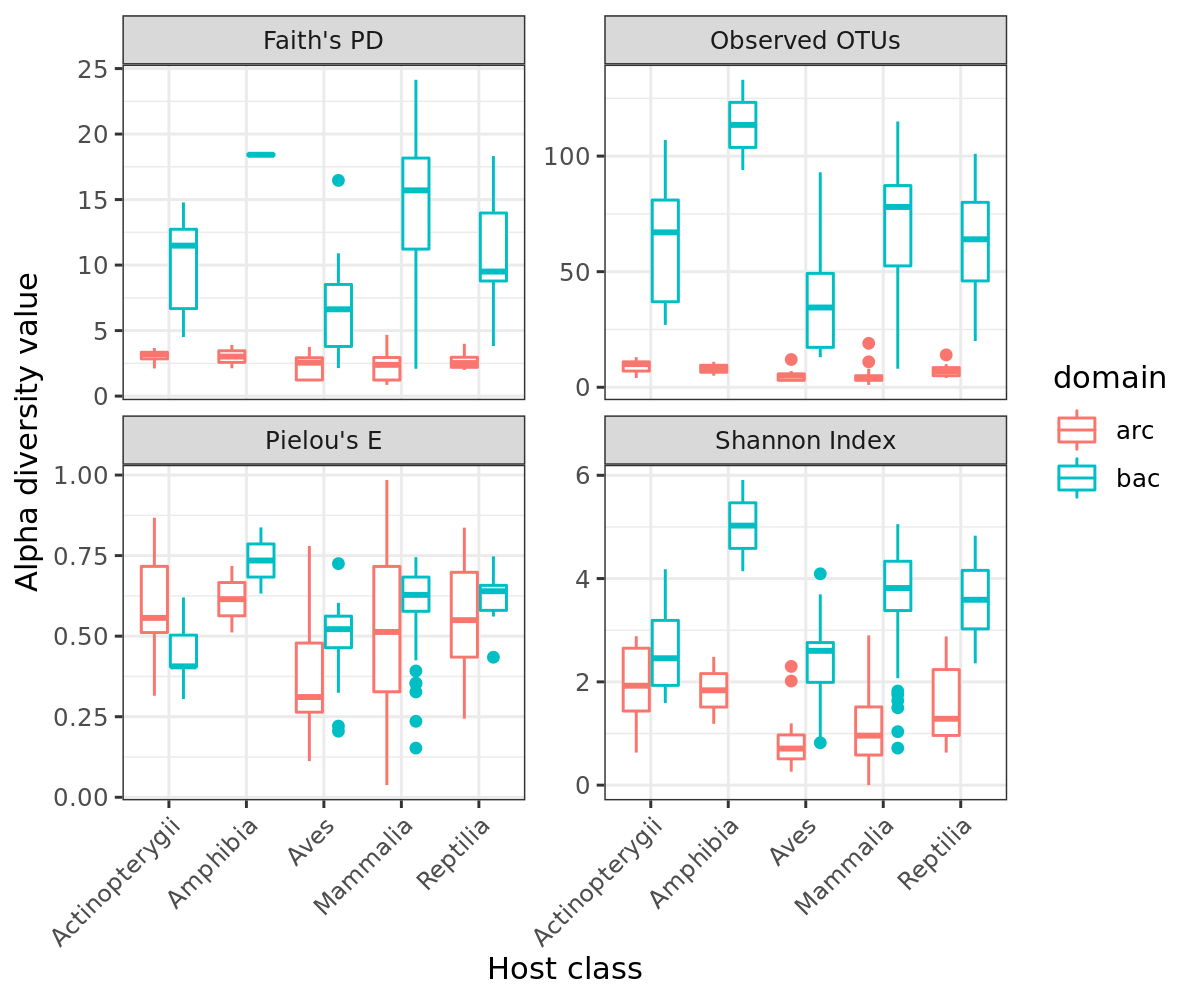

In [10]:
# distributions
p = alpha_div %>%
    ggplot(aes(class, alpha_div_value, color=domain)) +
    geom_boxplot() +
    labs(x='Host class', y='Alpha diversity value') +
    facet_wrap(~ alpha_div_metric, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(6,5)
plot(p)

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


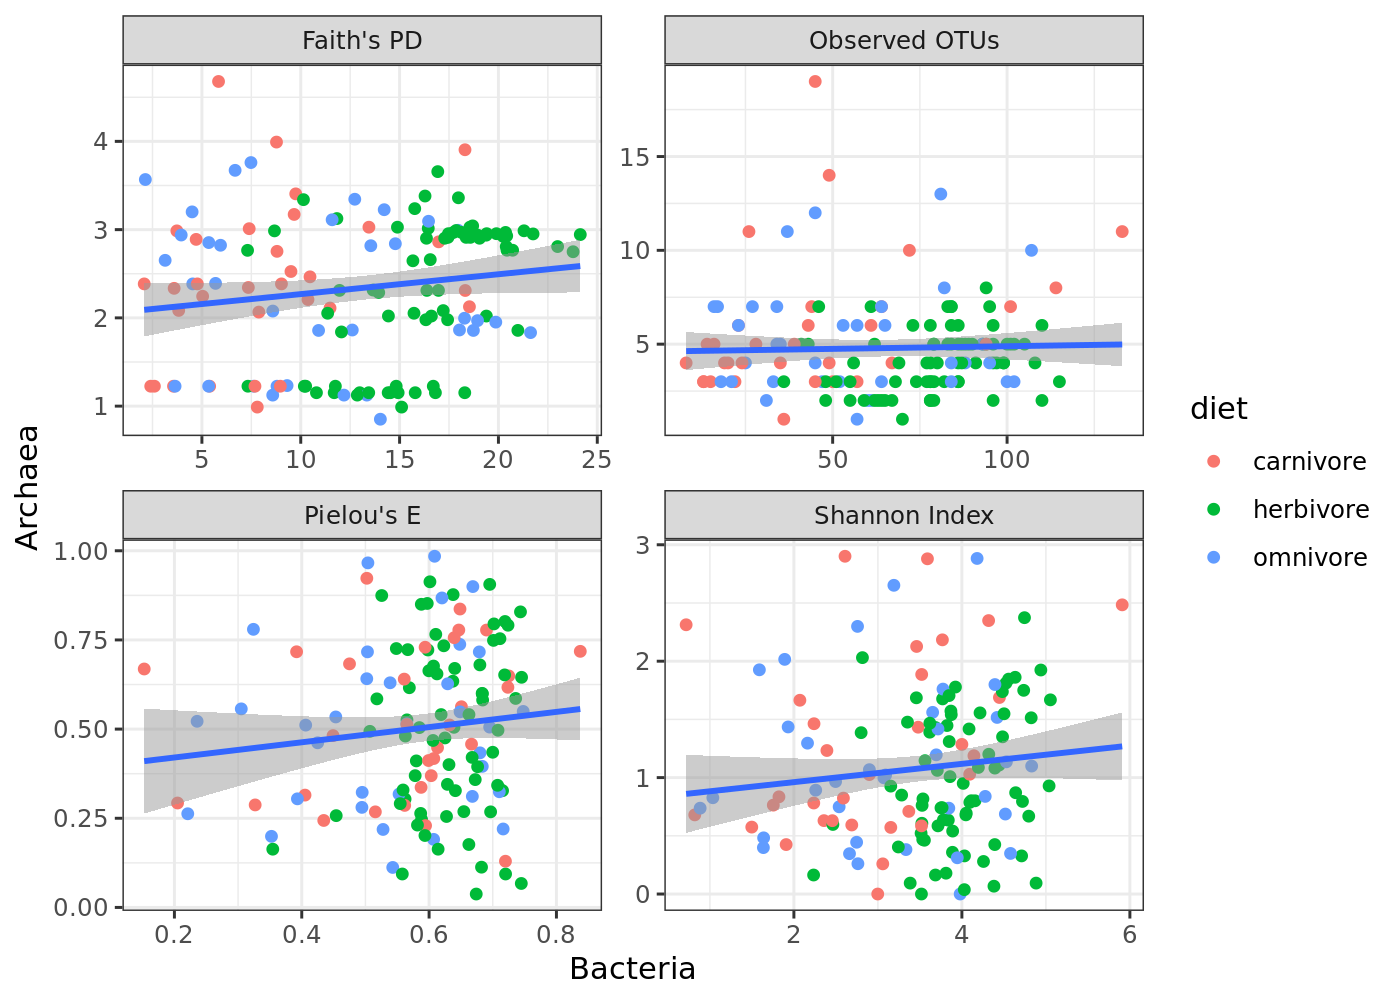

In [11]:
# correlation
p = alpha_div %>%
    spread(domain, alpha_div_value) %>%
    ggplot(aes(bac, arc)) +
    geom_point(aes(color=diet)) +
    geom_smooth(method='lm', alpha=0.5) +
    labs(y='Archaea', x='Bacteria') +
    facet_wrap(~ alpha_div_metric, scales='free') +
    theme_bw() 
p.dims(7,5)
plot(p)

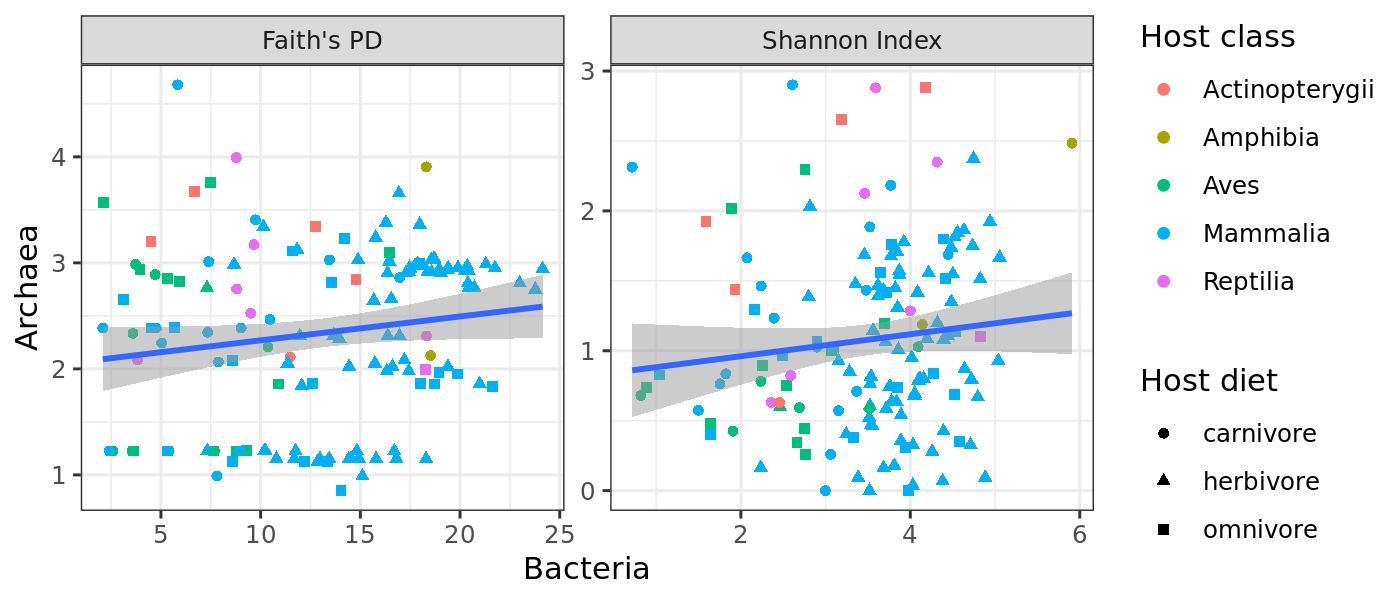

In [12]:
# correlation
p = alpha_div %>%
    filter(alpha_div_metric %in% c('Faith\'s PD', 'Shannon Index')) %>%
    spread(domain, alpha_div_value) %>%
    ggplot(aes(bac, arc)) +
    geom_point(aes(color=class, shape=diet)) +
    geom_smooth(method='lm', alpha=0.5) +
    scale_color_discrete('Host class') +
    scale_shape_discrete('Host diet') +
    labs(y='Archaea', x='Bacteria') +
    facet_wrap(~ alpha_div_metric, scales='free') +
    theme_bw() 
p.dims(7,3)
plot(p)

In [13]:
# checking correlation for each diversity measure
corr_test = function(x){
    x = x %>%
        spread(domain, alpha_div_value) 
    res = cor.test(x$arc, x$bac, alternative='two.sided', method='pearson')
    return(res)
}

corr_res = alpha_div %>%
    group_split(alpha_div_metric) %>%
    lapply(corr_test)
names(corr_res) = alpha_div$alpha_div_metric %>% unique
corr_res %>% names

[1] "Pielou's E"    "Observed OTUs" "Shannon Index" "Faith's PD"

In [14]:
corr_res

$`Pielou's E`

	Pearson's product-moment correlation

data:  x$arc and x$bac
t = 1.832, df = 138, p-value = 0.06911
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01212436  0.31201582
sample estimates:
      cor 
0.1540889 


$`Observed OTUs`

	Pearson's product-moment correlation

data:  x$arc and x$bac
t = 0.35097, df = 138, p-value = 0.7261
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1367172  0.1948016
sample estimates:
       cor 
0.02986349 


$`Shannon Index`

	Pearson's product-moment correlation

data:  x$arc and x$bac
t = 1.306, df = 135, p-value = 0.1938
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05708332  0.27427870
sample estimates:
      cor 
0.1117016 


$`Faith's PD`

	Pearson's product-moment correlation

data:  x$arc and x$bac
t = 1.3741, df = 138, p-value = 0.1716
alternative hypothesis: true correlation is not equal to

# sessionInfo

In [15]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq-eco/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.1.6 vegan_2.5-6       lattice_0.20-38   permute_0.9-5    
[5] ape_5.3           phyloseq_1.30.0   ggplot2_3.2.1     tidyr_1.0.0      
[9] dplyr_0.8.5      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3          Biostrings_2.54.0   assertthat_0.2.1